In [1]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [3]:
titanic_data = pd.read_csv('.\\datasets\\train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Смотрим какие данные пропущены.

In [5]:
X = titanic_data.drop(['Cabin', 'Survived', 'Name', 'PassengerId', 'Ticket'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)
X = X.drop(['Sex_female'], axis=1)
X = X.fillna({'Age': X.Age.median()})
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.score(X_train, y_train)

0.9798657718120806

In [12]:
clf.score(X_test, y_test)

0.7694915254237288

# Практика

In [13]:
cats_and_dog = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
cats_and_dog.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [14]:
cats_and_dog.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [15]:
cats_and_dog = pd.get_dummies(cats_and_dog)
cats_and_dog.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1


In [16]:
cats_and_dog = cats_and_dog.drop(['Вид_котик'], axis=1)

In [17]:
X = cats_and_dog.drop(['Вид_собачка'], axis=1)
y = cats_and_dog['Вид_собачка']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
clf.score(X_train, y_train)

1.0

In [20]:
clf.score(X_test, y_test)

1.0

In [21]:
test = pd.read_json('C:\\Users\\user\\Downloads\\dataset_209691_15 (1).txt')
test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,1,0
1,18,21.6,1,1,0
2,19,22.8,1,0,0
3,20,24.0,1,1,0
4,31,37.2,1,1,0


In [22]:
hh = clf.predict(test)

In [23]:
l = list(hh)
l.count(1)

56

In [25]:
patients = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
patients.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(patients.drop(['num'], axis=1), patients.num)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

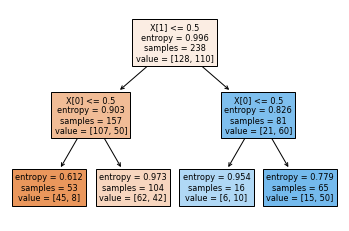

In [29]:
tree.plot_tree(clf, filled=True)

In [31]:
n0 = 157
E0 = 0.903
n1 = 81
E1 = 0.826
N = n0 + n1
IG = 0.996 - (n0 * E0 + n1 * E1)/N
IG

0.11920588235294105